Nhóm "Nhom8":


1.   Bùi Duy Anh Đức - 20520047
2.   Nguyễn Phúc Khang - 20520569
3.   Võ Trung Kiên - 20521492
4.   Hà Văn Linh - 20521529



In [86]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import os
from tqdm.notebook import tqdm

In [ ]:
!pip install gdown

In [111]:
import gdown

# Load data

Download dataset tổng hợp của lớp từ Google drive

In [112]:
%cd /content
!gdown https://drive.google.com/file/d/1UMe2eh7v--seqWhDqmAh6d5JnQ43yh0A/view?usp=sharing --fuzzy

/content
Downloading...
From: https://drive.google.com/uc?id=1UMe2eh7v--seqWhDqmAh6d5JnQ43yh0A
To: /content/class_data.json
100% 1.17M/1.17M [00:00<00:00, 43.9MB/s]


In [113]:
data = pd.read_json("/content/class_data.json")
data.head(10)

,headline,is_sarcastic
0,Tuyển Việt Nam nhận tin vui trước trận gặp Syria,0
1,Lịch thi đấu của U17 Việt Nam tại VCK U17 châu...,0
2,Lãi suất ngày 17/6: Nhiều ngân hàng giảm ngay ...,0
3,Hành khách 'đại náo' bằng miệng khiến Tề Thiên...,1
4,'Giật gân' về sự lạc hậu của y tế,1
5,Tham nhũng vặt luôn có mặt trên từng cây số,1
6,Đảo Ngọc ngập nhờ... nước,1
7,Luật 'đá' luật,1
8,Giá xăng dầu hôm nay 17/6: Tìm thấy động lực đ...,0
9,Giá vàng hôm nay 17/6: Tăng nhẹ do USD suy yếu,0


Visualize số lượng mỗi lớp

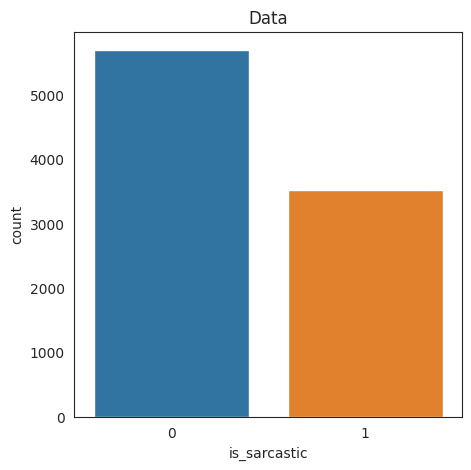

In [114]:
plt.figure(figsize=(5,5))
sb.countplot(data=data, x="is_sarcastic").set_title('Data')
plt.show()

Tính độ dài trung bình của một bản tin thông thường

In [115]:
def sentence_len(text):
  return len(text.split(' '));

df_len_headline = data["headline"].apply(lambda text: sentence_len(text))
print('Độ dài trung bình của tiêu đề bài báo trong bộ dữ liệu:', int(np.mean(df_len_headline)), 'từ')

Độ dài trung bình của tiêu đề bài báo trong bộ dữ liệu: 12 từ


Vẽ histogram để quan sát phân bố về độ dài các datapoint

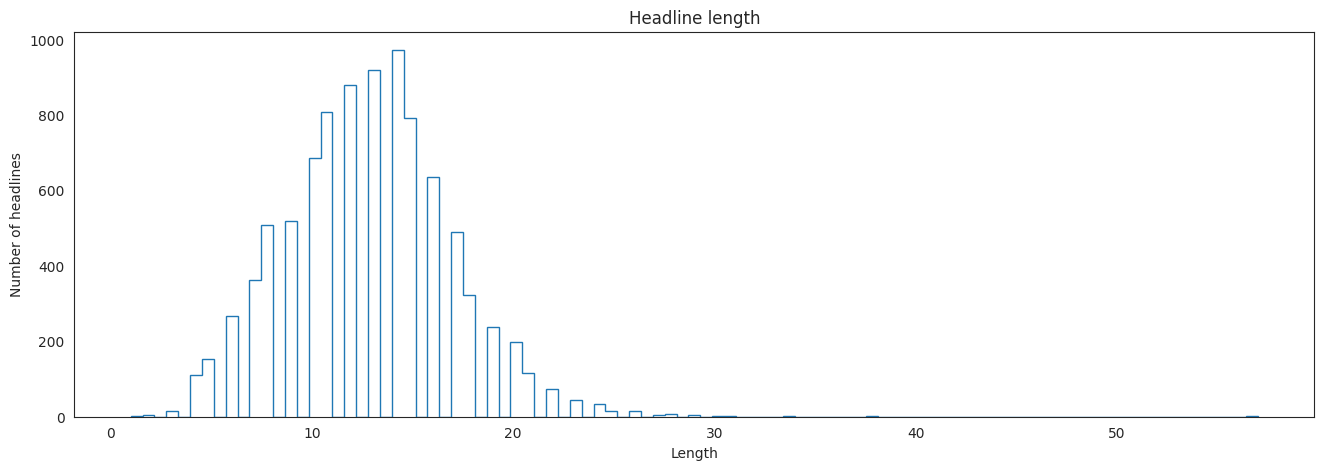

In [116]:
plt.figure(figsize=(16, 5))
plt.title("Headline length")
plt.xlabel('Length')
plt.ylabel('Number of headlines')
plt.hist(np.array(df_len_headline), bins=int(math.sqrt(len(df_len_headline))), histtype='step');

**Nhận xét:** phần lớn các bài báo có từ hơn 0 đến 25 từ

# Data preprocessing

In [117]:
import regex as re

## 1. Xoá HMTL tag

In [118]:
def remove_html(text):
  return re.sub(r'<[^>]*>', '', text)

## 2. Chuẩn hóa bảng mã Unicode

In [119]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

# Hàm tạo dict để convert định dạng cũ sang định dạng mới
def loaddicchar():
  dic = {}
  char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split('|')
  charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split('|')
  for i in range(len(char1252)):
      dic[char1252[i]] = charutf8[i]
  return dic

dicchar = loaddicchar()

# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

## 3. Đưa về dạng viết thường

In [120]:
def to_lower_case(sentence):
    sentence = sentence.lower()
    return sentence

print(to_lower_case('Tôi là dân IT!'))

tôi là dân it!


## 4. Tách từ tiếng Việt

In [ ]:
!pip install underthesea

In [122]:
from underthesea import word_tokenize

# Ví dụ
sentence = 'Xin chào, bạn có khỏe không? Rất vui được làm quen!'
print(word_tokenize(sentence))
print(word_tokenize(sentence, format='text'))

['Xin', 'chào', ',', 'bạn', 'có', 'khỏe', 'không', '?', 'Rất', 'vui', 'được', 'làm quen', '!']
Xin chào , bạn có khỏe không ? Rất vui được làm_quen !


## 5. Xóa các ký tự không cần thiết

In [123]:
def remove_unnecessary_charactor(document):
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    # xóa kí tự số
    document = re.sub(r'\w*\d\w*', '', document).strip()
    return document

In [124]:
document = 'Xin chào, bạn có khỏe không? Rất vui được làm quen 10k!'
remove_unnecessary_charactor(document)

'Xin chào bạn có khỏe không Rất vui được làm quen'

## 6. Hàm tổng hợp các bước trên

In [125]:
def text_preprocessing(document):
  document = remove_html(document)
  document = convert_unicode(document)
  document = to_lower_case(document)
  document = word_tokenize(document, format='text')
  document = remove_unnecessary_charactor(document)
  return document

In [126]:
text_preprocessing('Xin chào, bạn có khỏe không? Rất vui được làm quen!')

'xin chào bạn có khỏe không rất vui được làm_quen'

##7. Áp dụng các bước data preprocessing cho toàn bộ dữ liệu

In [127]:
data["preprocess_headline"] = data["headline"].apply(lambda x: text_preprocessing(x))
data

,headline,is_sarcastic,preprocess_headline
0,Tuyển Việt Nam nhận tin vui trước trận gặp Syria,0,tuyển việt nam nhận tin_vui trước trận gặp syria
1,Lịch thi đấu của U17 Việt Nam tại VCK U17 châu...,0,lịch thi_đấu của việt nam tại vck châu_á mớ...
2,Lãi suất ngày 17/6: Nhiều ngân hàng giảm ngay ...,0,lãi_suất ngày nhiều ngân_hàng giảm ngay lãi_...
3,Hành khách 'đại náo' bằng miệng khiến Tề Thiên...,1,hành_khách đại_náo bằng miệng khiến tề thiên c...
4,'Giật gân' về sự lạc hậu của y tế,1,giật_gân về sự lạc_hậu của y_tế
...,...,...,...
9197,Gặp chiến sĩ PCCC sinh năm 2003: Việc vất vả g...,1,gặp chiến_sĩ pccc sinh năm việc vất_vả giúp m...
9198,Gặp gỡ Nhà Xoài Đây: Mẹ 9x chia sẻ quan điểm n...,1,gặp_gỡ nhà xoài đây mẹ x chia_sẻ quan_điểm nu...
9199,CADMIUM - nữ sinh 2k6 khuấy đảo Rap Việt lần đ...,1,cadmium nữ_sinh khuấy_đảo rap việt lần đầu n...
9200,"Đem tiền về quê sống thử 1 tháng, chàng trai n...",1,đem tiền về quê sống thử tháng chàng trai nhậ...


##8. Loại bỏ stopword

Download danh sách stopword từ Github

In [ ]:
%cd /content
!git clone https://github.com/stopwords/vietnamese-stopwords.git

In [129]:
stopwords = open('/content/vietnamese-stopwords/vietnamese-stopwords.txt')
stopwords = stopwords.readlines()
stopwords = [x.strip() for x in stopwords]

Loại bỏ stopword

In [130]:
def remove_stopwords(document):
  words = document.split(' ')
  res = list()
  for word in words:
    if word not in stopwords:
      res.append(word)

  return ' '.join(res)

remove_stopwords(text_preprocessing('Theo nghị định đã ban hành, người dân cần ở trong nhà đến hết ngày 16/9.'))

'nghị_định ban_hành dân'

In [131]:
data["preprocess_headline"] = data["preprocess_headline"].apply(lambda x: remove_stopwords(x))
data

,headline,is_sarcastic,preprocess_headline
0,Tuyển Việt Nam nhận tin vui trước trận gặp Syria,0,tuyển việt nam tin_vui trận syria
1,Lịch thi đấu của U17 Việt Nam tại VCK U17 châu...,0,lịch thi_đấu việt nam vck châu_á
2,Lãi suất ngày 17/6: Nhiều ngân hàng giảm ngay ...,0,lãi_suất ngân_hàng lãi_suất quyết_định nhnn
3,Hành khách 'đại náo' bằng miệng khiến Tề Thiên...,1,hành_khách đại_náo miệng tề thiên bái_phục
4,'Giật gân' về sự lạc hậu của y tế,1,giật_gân lạc_hậu y_tế
...,...,...,...
9197,Gặp chiến sĩ PCCC sinh năm 2003: Việc vất vả g...,1,chiến_sĩ pccc sinh vất_vả giúp trưởng_thành
9198,Gặp gỡ Nhà Xoài Đây: Mẹ 9x chia sẻ quan điểm n...,1,gặp_gỡ xoài mẹ x chia_sẻ quan_điểm nuôi dạy
9199,CADMIUM - nữ sinh 2k6 khuấy đảo Rap Việt lần đ...,1,cadmium nữ_sinh khuấy_đảo rap việt đầu bàn_t...
9200,"Đem tiền về quê sống thử 1 tháng, chàng trai n...",1,đem tiền quê sống thử chàng trai giá bình_yên


In [138]:
data.is_sarcastic.value_counts()

0    5691
1    3511
Name: is_sarcastic, dtype: int64

## 9. Lưu dữ liệu đã tiền xử lí

In [139]:
data.to_csv("/content/preprocessing_data.csv", index=False)

# Xây dựng mô hình phân lớp

In [134]:
from numpy import expand_dims
import pickle
import time
from scipy.sparse.csr import csr_matrix as spare_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import sparse

<ipython-input-134-77069b6e35eb>:4: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  from scipy.sparse.csr import csr_matrix as spare_matrix


In [149]:
df = pd.read_csv("/content/preprocessing_data.csv")
df

,headline,is_sarcastic,preprocess_headline
0,Tuyển Việt Nam nhận tin vui trước trận gặp Syria,0,tuyển việt nam tin_vui trận syria
1,Lịch thi đấu của U17 Việt Nam tại VCK U17 châu...,0,lịch thi_đấu việt nam vck châu_á
2,Lãi suất ngày 17/6: Nhiều ngân hàng giảm ngay ...,0,lãi_suất ngân_hàng lãi_suất quyết_định nhnn
3,Hành khách 'đại náo' bằng miệng khiến Tề Thiên...,1,hành_khách đại_náo miệng tề thiên bái_phục
4,'Giật gân' về sự lạc hậu của y tế,1,giật_gân lạc_hậu y_tế
...,...,...,...
9197,Gặp chiến sĩ PCCC sinh năm 2003: Việc vất vả g...,1,chiến_sĩ pccc sinh vất_vả giúp trưởng_thành
9198,Gặp gỡ Nhà Xoài Đây: Mẹ 9x chia sẻ quan điểm n...,1,gặp_gỡ xoài mẹ x chia_sẻ quan_điểm nuôi dạy
9199,CADMIUM - nữ sinh 2k6 khuấy đảo Rap Việt lần đ...,1,cadmium nữ_sinh khuấy_đảo rap việt đầu bàn_t...
9200,"Đem tiền về quê sống thử 1 tháng, chàng trai n...",1,đem tiền quê sống thử chàng trai giá bình_yên


In [150]:
df.isna().sum()

headline                2
is_sarcastic            0
preprocess_headline    11
dtype: int64

In [151]:
df.dropna(inplace=True)

In [152]:
headlines = df["preprocess_headline"]
labels = df["is_sarcastic"]

##1. Train, test split


In [153]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(headlines, labels, test_size=0.2, random_state=42, stratify=labels)

In [154]:
train_y.value_counts()

0    4550
1    2802
Name: is_sarcastic, dtype: int64

In [155]:
test_y.value_counts()

0    1138
1     701
Name: is_sarcastic, dtype: int64

##2. Huấn luyện mô hình

 ### 1. Multiple Naive Bayes

Train

In [170]:
mnb = Pipeline([
               # convert dataset sang dạng vector count dựa trên một vocab chung (BoW), loại bỏ những word có tần suất xuất hiện > 0.8
               ('vectorize', CountVectorizer(max_df=0.8, encoding='utf-16')),
               # áp dụng tf-idf để extract feature
               ('feature extracter', TfidfTransformer()),
               # áp dụng mô hình phân lớp
               ('classifier', MultinomialNB())
])

start = time.time()
mnb.fit(train_x, train_y)
print('Multinomial Bayes training time: %d' %(time.time() - start))

Multinomial Bayes training time: 0


Đánh giá

In [171]:
pred_y = mnb.predict(test_x)

score = mnb.score(test_x, test_y)
print('Multinomial Naive Bayes score: ', score)

Multinomial Naive Bayes score:  0.8183795541054921


In [172]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1138
           1       0.83      0.66      0.74       701

    accuracy                           0.82      1839
   macro avg       0.82      0.79      0.80      1839
weighted avg       0.82      0.82      0.81      1839



<Axes: >

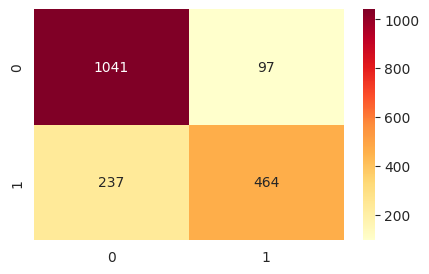

In [173]:
plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(test_y, pred_y)
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

### 2. Logistic Regression

Train

In [176]:
lgres = Pipeline([
                  ('vectorize', CountVectorizer(max_df=0.8, encoding='utf-16')),
                  ('feature extracter', TfidfTransformer()),
                  ('classifier', LogisticRegression())
])

start = time.time()
lgres.fit(train_x, train_y)
print('Logistic Regression training time:', time.time() - start)

Logistic Regression training time: 0.31597280502319336


Đánh giá

In [177]:
pred_y = lgres.predict(test_x)

score = lgres.score(test_x, test_y)
print('Logistic regression score: ', score)

Logistic regression score:  0.8249048395867319


In [178]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1138
           1       0.83      0.68      0.75       701

    accuracy                           0.82      1839
   macro avg       0.83      0.80      0.81      1839
weighted avg       0.83      0.82      0.82      1839



<Axes: >

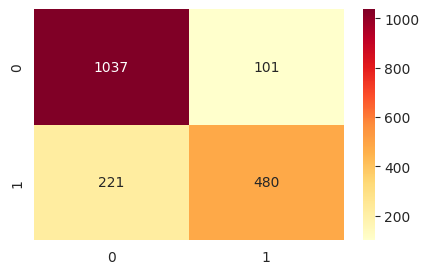

In [179]:
plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

### 3. SVM

Train

In [180]:
svm = Pipeline([
                ('vectorize', CountVectorizer(max_df=0.8)),
                ('feature extractor', TfidfTransformer()),
                ('classifier', SVC(random_state=42))
])

start = time.time()
svm.fit(train_x, train_y)
print('Support Vector Machine training time:', (time.time() - start))

Support Vector Machine training time: 6.281620264053345


Đánh giá

In [181]:
pred_y = svm.predict(test_x)

score = svm.score(test_x, test_y)
print('SVM score: ', score)

SVM score:  0.8379554105492115


In [182]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1138
           1       0.82      0.73      0.78       701

    accuracy                           0.84      1839
   macro avg       0.83      0.82      0.82      1839
weighted avg       0.84      0.84      0.84      1839



<Axes: >

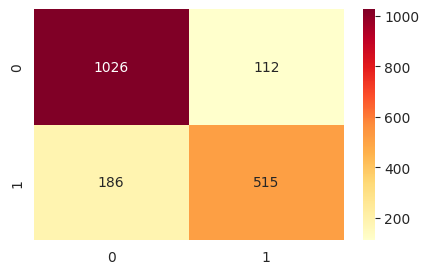

In [183]:
plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

# So sánh các mô hình

| Mô hình              | Thời gian train (s) | Accuracy | F1-score (class 0) | F1-score (class 1)
| -                    | -               | -        | -| -
| Multiple Naive Bayes | 0            | 0.818    | 0.86| 0.74
| Logistic Regression  | 0.316          | 0.825    | 0.87| 0.75
| SVM                  | 6.282           | 0.838    | 0.87| 0.78



  *   Thời gian train: MNB có thời gian train nhanh nhất, SVM tốn nhiều thời gian train nhất
  *   Accuracy: SVM đạt độ chính xác cao nhất
  *   F1-score:
1.   Class 0 (non_sarcastic): 3 mô hình cho kết quả tương đương nhau
2.   Class 1 (is_sarcastic): SVM cho thấy sự hiệu quả hơn 2 mô hình kia khi có F1-score trên lớp thiểu số đạt 78%





# Thử nghiệm

Tiền xử lí

In [184]:
def clean_text(text):
  text = text_preprocessing(text)
  text = remove_stopwords(text)
  return text

Dự đoán bằng SVM

In [194]:
text = clean_text(input("Hãy nhập tiêu đề một bài báo hoặc tin tức: "))
print("Kết quả dự đoán tính châm biếm của tiêu đề:", "Có" if svm.predict([text])[0]==1 else "Không")

Hãy nhập tiêu đề một bài báo hoặc tin tức: Đời nghệ sĩ bạc bẽo lắm!
Kết quả dự đoán tính châm biếm của tiêu đề: Có


In [195]:
text = clean_text(input("Hãy nhập tiêu đề một bài báo hoặc tin tức: "))
print("Kết quả dự đoán tính châm biếm của tiêu đề:", "Có" if svm.predict([text])[0]==1 else "Không")

Hãy nhập tiêu đề một bài báo hoặc tin tức: BLACKPINK tổ chức concert ở Việt Nam vào tháng 7 tới
Kết quả dự đoán tính châm biếm của tiêu đề: Không
